# Statistics Meets Logistics
--- 

## Description
This notebook holds the DataFrames and analysis for the project.

Requirements for the project environment can be found in https://github.com/luiul/statistics-meets-logistics/blob/main/requirements.txt. **Disclaimer**: the project has not been tested in other environments. 

## Overview
Start here!

## Goal 
The goal of this project is to perform a regression analysis given raw download and upload data to estimate the throughput of the system, i.e. the label we're trying to predict. 

## In General
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features').

## Question

# Import Libraries and Set Options
---

## Import Libraries

In [1]:
# Vector (Series) & Matrix (DateFrame) manipulation 
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Python Utilities
# Generate datetime objects from raw timestamps and vice versa
from datetime import datetime

# OS Interface
# import os

# Regex search patterns 
# import re

In [ ]:
# Split Function (see Signature for correct tuple unpacking)
# from sklearn.model_selection import train_test_split

# Linear Regression Model
# from sklearn.linear_model import LinearRegression

In [ ]:
# Polynomial Regression ( poly_trafo: X->X*...*X )
# from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Data Scaling (iff values are in different order of magnitude)
# from sklearn.preprocessing import StandardScaler

In [ ]:
# Elastic Net Regularization: start here for regularization in Linear Regression. Make sure to keep an l1_ratio that allows us to go fully to Lasso or fully to Ridge. See Lasso and Ridge explanations below. 
# from sklearn.linear_model import ElasticNetCV

In [ ]:
# L2: Ridge Regularization: adds beta squared shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. L2 CV takes an alpha tuple and computes the hyper-parameter that delivers the best performance (either based on default scorer or one from the SCORES dictionary)
# from sklearn.linear_model import RidgeCV

# Use from sklearn.linear_model import Ridge in case no CV is needed

In [ ]:
# L1: Lasso Regularization: adds absolute beta value shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. There are two ways to determine the alpha hyper-parameter: (a) provide list of alphas as an array (b) alpha can be set automatically by the class based off epsilon and n_alphas (we use the default values)
# from sklearn.linear_model import LassoCV

# Use from sklearn.linear_model import Lasso in case no CV is needed

In [ ]:
# Performance Evaluation: common evaluation metrics; they can also be found in the SCORES dictionary (although transformed s.t. the higher the score the better, the model performance)
# from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Dictionary with different scorer objects; higher return values are better than lower return values by convention, e.g. negative error maximization -> the higher the score, the better the model performance
# from sklearn.metrics import SCORERS

In [ ]:
# Normal Probability Plot
# import scipy as sp

In [ ]:
# ML Model Deployment 
# from joblib import dump, load

## Check Prerequisites

In [ ]:
# calling np.version.version should return 1.18.1
# np.version.version

# calling pd.__version__ should return 1.1.2
# pd.__version__

## Set Options

In [31]:
pd.set_option('display.max_columns',None)
# avoid truncate view of DataFrame (scroll to view all columns); set to 0 for pandas to auto-detect the with of the terminal and print truncated object that fits the screen width

# pd.set_option('float_format', '{:.2f}'.format)
# prints floats with two decimal points; do not comment out in this project since the features lat and lon have sigficant figures after two decimal points

In [ ]:
# Display all outsputs if the cell has multiple commands as its input

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Feature Engineering and Data Preparation
---

## Instantiate DataFrames and Explore Features

### Read in Data
We read in the feature description and the raw data (d_df is the raw download data and u_df is the raw upload data). 

In [127]:
# with open('feature-description.txt',mode='r') as f:
#     print(f.read())  

In [2]:
d_df = pd.read_csv('raw_data_dl.csv', delim_whitespace=True)

In [33]:
d_df.head()

,timestamp,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,connected,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,rtt,measurement,location,throughput
0,10.33,1544432937,99.42,51.490553,7.413966,157.63,11.83,0.00,79.35,1,-85,-5,22,10,50,7,26385408,95,0,0.1,41,1544432927,campus,6.83763
1,21.87,1544432949,237.43,51.490715,7.416002,152.41,10.76,-0.52,89.45,1,-84,-6,11,13,52,4,29391105,167,1,2.0,58,1544432927,campus,9.71463
2,32.46,1544432959,325.26,51.490668,7.417176,154.64,6.19,-0.62,27.05,1,-82,-6,21,15,54,4,29391105,167,2,2.0,57,1544432927,campus,7.30594
3,46.40,1544432973,448.27,51.491839,7.416804,155.87,9.77,-0.98,342.45,1,-94,-9,9,9,45,4,29391105,167,3,3.0,163,1544432927,campus,3.94997
4,54.95,1544432982,540.48,51.492531,7.416222,154.41,12.33,0.01,336.68,1,-90,-6,16,9,45,4,29391105,167,4,5.0,59,1544432927,campus,8.54884


In [4]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    2141 non-null   float64
 1   rawTimesamp  2141 non-null   int64  
 2   distance     2141 non-null   float64
 3   lat          2141 non-null   float64
 4   lon          2141 non-null   float64
 5   alt          2141 non-null   float64
 6   speed        2141 non-null   float64
 7   acc          2141 non-null   float64
 8   dir          2141 non-null   float64
 9   connected    2141 non-null   int64  
 10  rsrp         2141 non-null   int64  
 11  rsrq         2141 non-null   int64  
 12  sinr         2141 non-null   int64  
 13  cqi          2141 non-null   int64  
 14  ss           2141 non-null   int64  
 15  ta           2141 non-null   int64  
 16  ci           2141 non-null   int64  
 17  pci          2141 non-null   int64  
 18  id           2141 non-null   int64  
 19  payloa

---

In [38]:
u_df = pd.read_csv('raw_data_ul.csv', delim_whitespace=True)

In [5]:
u_df.head()

,timestamp,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,connected,...,ta,ci,pci,id,payload,throughput,rtt,txPower,measurement,location
0,11.53,1544432938,113.75,51.490592,7.414306,156.39,12.21,0.50,77.59,1,...,7,26385408,95,0,4.0,24.5211,35,12.30470,1544432927,campus
1,21.33,1544432948,231.40,51.490717,7.415835,152.53,11.17,0.00,87.24,1,...,4,29391105,167,1,2.0,14.8561,51,10.01560,1544432927,campus
2,32.22,1544432959,323.73,51.490634,7.417138,154.23,6.44,0.00,48.55,1,...,4,29391105,167,2,4.0,16.2684,57,4.34375,1544432927,campus
3,54.69,1544432982,537.34,51.492531,7.416222,154.41,12.33,0.02,336.68,1,...,4,29391105,167,4,8.0,14.5886,60,17.31250,1544432927,campus
4,63.98,1544432991,650.07,51.493484,7.415836,153.05,11.69,-0.18,348.09,1,...,4,29391105,167,5,6.0,13.1255,57,19.93750,1544432927,campus


In [6]:
u_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    2142 non-null   float64
 1   rawTimesamp  2142 non-null   int64  
 2   distance     2142 non-null   float64
 3   lat          2142 non-null   float64
 4   lon          2142 non-null   float64
 5   alt          2142 non-null   float64
 6   speed        2142 non-null   float64
 7   acc          2142 non-null   float64
 8   dir          2142 non-null   float64
 9   connected    2142 non-null   int64  
 10  rsrp         2142 non-null   int64  
 11  rsrq         2142 non-null   int64  
 12  sinr         2142 non-null   int64  
 13  cqi          2142 non-null   int64  
 14  ss           2142 non-null   int64  
 15  ta           2142 non-null   int64  
 16  ci           2142 non-null   int64  
 17  pci          2142 non-null   int64  
 18  id           2142 non-null   int64  
 19  payloa

### Move Label to the End of the DataFrame & Drop Columns without Significant Information

Note that the label we're trying to predict given the features is not at the end of the DataFrame. For convenience we're going to rearrange the columns in the data frame. 

In [35]:
label = 'throughput'

d_cols = list(d_df.columns)
d_cols.pop(d_cols.index(label))

d_df = d_df[d_cols+[label]]

d_df = d_df.drop('connected',axis=1)

In [40]:
d_df.head()

,timestamp,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,rtt,measurement,location,throughput
0,10.33,1544432937,99.42,51.490553,7.413966,157.63,11.83,0.00,79.35,-85,-5,22,10,50,7,26385408,95,0,0.1,41,1544432927,campus,6.83763
1,21.87,1544432949,237.43,51.490715,7.416002,152.41,10.76,-0.52,89.45,-84,-6,11,13,52,4,29391105,167,1,2.0,58,1544432927,campus,9.71463
2,32.46,1544432959,325.26,51.490668,7.417176,154.64,6.19,-0.62,27.05,-82,-6,21,15,54,4,29391105,167,2,2.0,57,1544432927,campus,7.30594
3,46.40,1544432973,448.27,51.491839,7.416804,155.87,9.77,-0.98,342.45,-94,-9,9,9,45,4,29391105,167,3,3.0,163,1544432927,campus,3.94997
4,54.95,1544432982,540.48,51.492531,7.416222,154.41,12.33,0.01,336.68,-90,-6,16,9,45,4,29391105,167,4,5.0,59,1544432927,campus,8.54884


In [124]:
# note that although per the documentation the SS is made redundant by the RSRP the correlation is not 1. 

# (we'll focus on SS (signal strentgh) as it is defined for various different stadards (see: https://www.lte-anbieter.info/technik/asu.php))

d_df[['rsrp', 'rsrq', 'sinr', 'cqi', 'ss']].corr()

,rsrp,rsrq,sinr,cqi,ss
rsrp,1.000000,0.596054,0.657801,0.556257,0.958165
rsrq,0.596054,1.000000,0.675048,0.559617,0.450645
sinr,0.657801,0.675048,1.000000,0.634304,0.597780
cqi,0.556257,0.559617,0.634304,1.000000,0.501218
ss,0.958165,0.450645,0.597780,0.501218,1.000000


<AxesSubplot:xlabel='rsrp', ylabel='ss'>

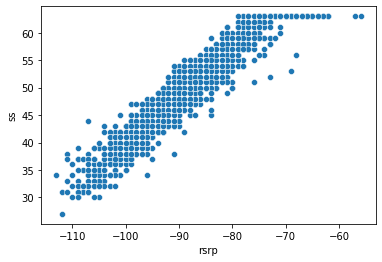

In [82]:
sns.scatterplot(data=d_df, x='rsrp', y='ss')

---

In [41]:
u_cols = list(u_df.columns)
u_cols.pop(u_cols.index(label))

u_df = u_df[u_cols+[label]]

u_df = u_df.drop('connected',axis=1)

In [42]:
u_df.head()

,timestamp,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,rtt,txPower,measurement,location,throughput
0,11.53,1544432938,113.75,51.490592,7.414306,156.39,12.21,0.50,77.59,-85,-5,22,10,50,7,26385408,95,0,4.0,35,12.30470,1544432927,campus,24.5211
1,21.33,1544432948,231.40,51.490717,7.415835,152.53,11.17,0.00,87.24,-84,-6,11,13,52,4,29391105,167,1,2.0,51,10.01560,1544432927,campus,14.8561
2,32.22,1544432959,323.73,51.490634,7.417138,154.23,6.44,0.00,48.55,-82,-6,21,15,54,4,29391105,167,2,4.0,57,4.34375,1544432927,campus,16.2684
3,54.69,1544432982,537.34,51.492531,7.416222,154.41,12.33,0.02,336.68,-90,-6,16,9,45,4,29391105,167,4,8.0,60,17.31250,1544432927,campus,14.5886
4,63.98,1544432991,650.07,51.493484,7.415836,153.05,11.69,-0.18,348.09,-101,-10,13,15,40,4,29391105,167,5,6.0,57,19.93750,1544432927,campus,13.1255


### Check for Outliers

<AxesSubplot:xlabel='throughput', ylabel='Count'>

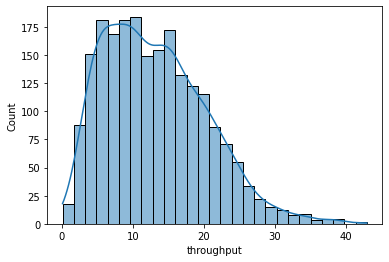

In [43]:
sns.histplot(data=d_df, x=label, kde=True)

<AxesSubplot:xlabel='throughput'>

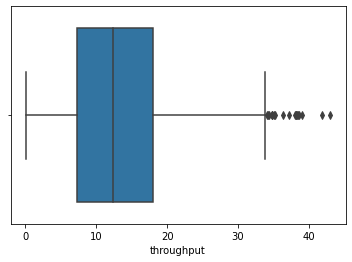

In [44]:
sns.boxplot(data=d_df, x=label)

In [13]:
d_label = d_df[label]

In [15]:
q75, q25 = np.percentile(a=d_label, q=[75,25])
d_IQR = q75 - q25

d_low_lim = q25-1.5*d_IQR
d_up_lim = q75+1.5*d_IQR

In [16]:
d_outliers = d_label[(d_label < d_low_lim) | (d_label > d_up_lim)]
len(d_outliers)

# there are 19 outlierts in the data set by IQR method 

19

In [22]:
f'Outliers are {len(d_outliers)/len(d_df)*100:.2f}% of the Download data'

'Outliers are 0.89% of the Download data'

<AxesSubplot:xlabel='throughput', ylabel='Count'>

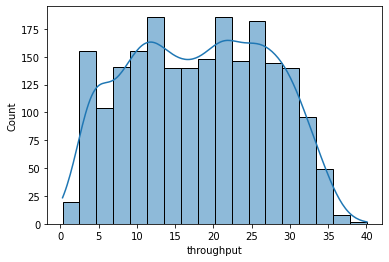

In [24]:
sns.histplot(data=u_df, x=label, kde=True)

<AxesSubplot:xlabel='throughput'>

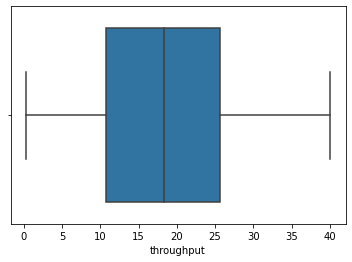

In [25]:
sns.boxplot(data=u_df, x=label)

In [28]:
u_label = u_df[label]

q75, q25 = np.percentile(a=u_label, q=[75,25])
u_IQR = q75 - q25

u_low_lim = q25-1.5*u_IQR
u_up_lim = q75+1.5*u_IQR

u_outliers = u_label[(u_label < u_low_lim) | (u_label > u_up_lim)]
len(u_outliers)

0

### Check existing Correlations in the Data

In [51]:
d_df.corr()['throughput'].sort_values(ascending=False)
# note that payload is highly positively correlated to download throughput (it also makes sense that a higher payload produces a high throughput)

throughput     1.000000
payload        0.672673
ss             0.309925
rsrp           0.309611
rsrq           0.297185
sinr           0.276993
cqi            0.232431
distance       0.132209
id             0.081843
timestamp      0.080304
rawTimesamp    0.044219
measurement    0.044205
lat            0.037768
speed          0.028435
alt            0.020332
acc           -0.020694
lon           -0.041582
ci            -0.043159
dir           -0.045619
pci           -0.046434
rtt           -0.136432
ta            -0.172634
Name: throughput, dtype: float64

In [1]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=d_df, x='payload', y='throughput',hue='rsrp',palette='magma')

#plt.axhline(y=d_up_lim,color='orange')
#plt.axhline(y=d_low_lim,color='orange')

# note that within every payload size we have a distribution and as payload increses, so does the throughput but also the variane of the distribution within the payload

# remove the outlier at x=0.1

NameError: name 'plt' is not defined

In [68]:
np.sort(d_df['payload'].unique())
# precision of the payload column / x axis 

array([ 0.1,  0.5,  1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. ,
       10. ])

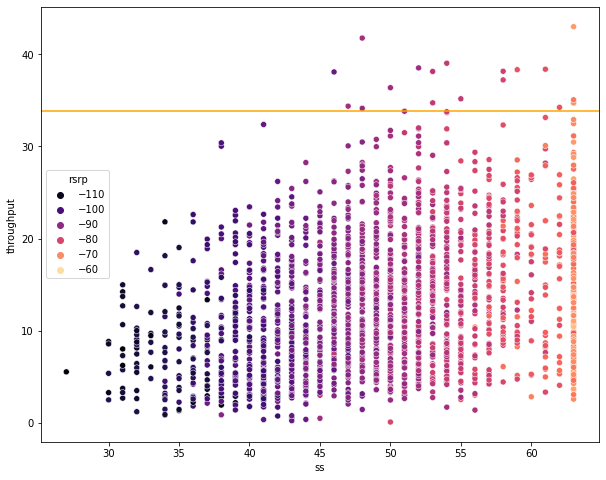

In [116]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=d_df, x='ss', y='throughput',hue='rsrp',palette='magma')

plt.axhline(y=d_up_lim,color='orange')

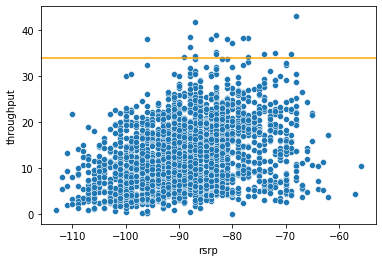

In [103]:
sns.scatterplot(data=d_df, x='rsrp', y='throughput')
plt.axhline(y=d_up_lim,color='orange')

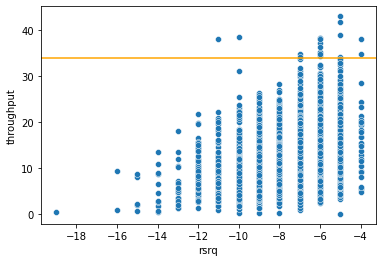

In [104]:
sns.scatterplot(data=d_df, x='rsrq', y='throughput')
plt.axhline(y=d_up_lim,color='orange')

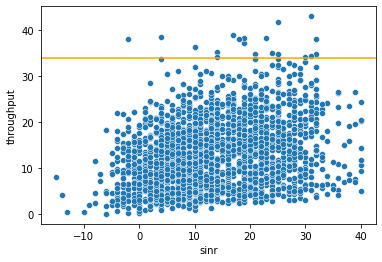

In [105]:
sns.scatterplot(data=d_df, x='sinr', y='throughput')
plt.axhline(y=d_up_lim,color='orange')

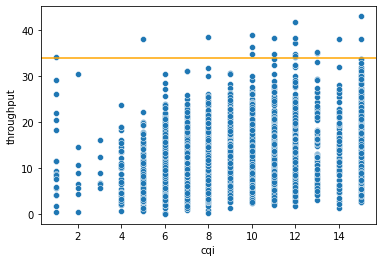

In [106]:
sns.scatterplot(data=d_df, x='cqi', y='throughput')
plt.axhline(y=d_up_lim,color='orange')

---

In [52]:
u_df.corr()['throughput'].sort_values(ascending=False)
# note that payload is highly positively correlated to upload throughput (it also makes sense that a higher payload produces a high throughput)

throughput     1.000000
payload        0.607698
ss             0.386890
rsrp           0.379373
rsrq           0.333265
sinr           0.323090
cqi            0.254415
distance       0.093922
id             0.083222
timestamp      0.082215
lat            0.059516
acc            0.025546
rawTimesamp    0.018246
measurement    0.018232
alt           -0.009411
pci           -0.014262
speed         -0.019170
lon           -0.053865
dir           -0.055719
ci            -0.059875
rtt           -0.148920
ta            -0.209764
txPower       -0.230067
Name: throughput, dtype: float64

In [ ]:
dl = df[[]]

In [ ]:
dl.corr()

---

In [ ]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='location')

In [ ]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='distance',palette='magma')

In [ ]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='speed',palette='magma')

In [ ]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='acc',palette='magma')

In [ ]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='rawTimesamp')

In [ ]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='timestamp')

In [ ]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='measurement')

In [ ]:
sns.scatterplot(data=ul, x='lat',y='lon',hue='location')

In [ ]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='alt')

In [ ]:
sns.scatterplot(data=ul, x='lat',y='lon',hue='alt')

In [ ]:
sns.scatterplot(data=dl, x='lat',y='lon',hue='throughput',palette='magma')

In [ ]:
sns.scatterplot(data=ul, x='lat',y='lon',hue='throughput',palette='magma')

In [ ]:
dl.isnull().sum().sum()
# no missing data in dl

In [ ]:
ul.isnull().sum().sum()
# no missing data in ul

In [ ]:
dl.info()
# dl has almost 2,200 data points, unlabeled index, 24 features, no missing data; dtypes: 13 ints, 10 floats, and 1 object

In [ ]:
ul.info()
# ul has almost 2,200 data points, unlabeled index, 25 features (versus 24), no missing data; dtypes: 13 ints, 11 floats and 1 object

In [ ]:
# timestamp: seems like an 'arbitrary' variable (drop this column?)
# rawTimesamp: unix timestamp; visit unixtimestamp.com/ to convert (correction of column name!)
# distance: distance from cell tower
# lat: latitude
# lon: longitude
# alt: altitude relative to NHN
# speed: [speed] = m/s
# acc: [acc] = m/s**2; contains negative values!
# dir: [dir] = grad; north === 0; dir: S -> [0,359.99]
# connect: LTE connection; here always one (drop this column!)

# signal performance indicator; visit cablefree.net/wirelesstechnology/4glte/rsrp-rsrq-measurement-lte/ for more detail
    # rsrp: performance indicator based on path loss; all values are negative (possibly irrelevant!)
    # rsrq: performance indicator; can contain negative values (possible irrelevant!)
    # sinr: performance indicator; can contain negative values (possible irrelevant!)
    # cqi: ? 
    # ss === Arbitrary Strength Unit (ASU); rsrp = ASU - 140 (redudant! drop this column!) 
    # ta: ? 
    # ci: ? 

# pci: physical cell ID; internal information (irrelevant!)
# id: vehicle ID
# payload: [payload] = MB
# throughput: [throughput] = mbits (key value!)
# rtt: [rtt] = ms; round trip time for the signal (vehicle -> tower -> vehicle)
# measuremt: experiment number 
# location: name of the location; location: S -> {'campus', 'highway', 'suburban', 'urban'}

# there is no column reflecting the frequency of the signal (see Variablenbeschreibung in moodle) (?)

# drop: timestamp, connect, ss, pci (?)
# rename: rawTimesamp -> timestamp
dl.columns

In [ ]:
# txPower: [txPower] = dBm; measurement of signal strength 

# drop: timestamp, connect, ss, pci (?)
# rename: rawTimesamp -> timestamp
ul.columns

In [ ]:
# Variablenbeschreibung

# - timestamp_ms ist ein Unix Timestamp, welcher die Umrechnung in eine konkrete Uhrzeit ermöglicht
# (siehe https://www.unixtimestamp.com/)
# - altitude_m die Höhe über Normalnull
# - veclocity ist in meter/s und acceleration in meter/s^2: Für die Beschleunigung sind negative Werte durch Bremsen 
# möglich (Änderung der Geschwindigkeit)
# - direction ist die Richtung in Grad, Norden entspricht 0 - isRegistered gibt an, ob das Gerät eine aktive 
# Verbindung zu einer LTE Zelle hat
# - rsrp ist ein Indikator für die Empfangsleistung und durch den Pfadverlust immer negativ – das heißt dann 
# einfach, dass nur sehr geringe Leistungsmengen beim Endgerät ankommen - rsrq und rssinr sind Verhältnisse von 
# Leistungen, auch hier sind negative werte möglich 
# (siehe auch https://www.cablefree.net/wirelesstechnology/4glte/rsrp-rsrq-measurement-lte/)
# - ss entspricht der Arbitrary Strength Unit (ASU) und ist redundant zum RSRP, da RSRP = ASU – 140
# - pci ist die Physical Cell Id, welche intern vom Endgerät verwendet wird, um Codierungsaufgaben zu machen 
# -> Sollte für euch nicht wichtig sein
# - payload entspricht der übertragenden Datenmenge in Megabyte
# - througput_mbits entspricht der Datenrate und somit der Zielgröße
# - connected 1 wenn eine Verbindung besteht 0 sonst
# - rtt_ms ist die Round Trip Time: Also die Signallaufzeit vom Sender zum Empfänger und wieder zurück
# - txPower_dBm entspricht der Sendeleistung des Endgerätes (somit auch nur im Uplink verfügbar, weil das 
# Endgerät im Downlink nur empfängt)
# - f_mhz entspricht der Trägerfrequenz der Basisstation, daher ist dies auch in wichtiges Feature, da die 
# Frequenz einen großen Einfluss auf die Funkausbreitungseigenschaften hat 
# - measurement ist die jeweilige Messfahrt

In [ ]:
dl = dl.drop(['connected','timestamp'],axis=1)

In [ ]:
ul = ul.drop(['connected','timestamp'],axis=1)

In [ ]:
dl.head(3)

In [ ]:
ul.head(3)

In [ ]:
dl.describe().transpose()
# some statistical values have no meaningful interpretation!

In [ ]:
ul.describe().transpose()
# some statistical values have no meaningful interpretation!

In [ ]:
dl['id'].unique()
# array of vehicle IDs?

In [ ]:
ul['id'].unique()
# array of vehicle IDs?

In [ ]:
dl['id'].unique() == ul['id'].unique()
# note that the vehicles are not identical 

In [ ]:
dl['location'].unique()

In [ ]:
dl['location'].unique() == ul['location'].unique()

In [ ]:
# len(dl['timestamp'].unique())
# we dropped this feature

In [ ]:
len(dl['rawTimesamp'].unique())
# note that 'timestamp' and 'rawTimesamp' are differing amount of unique values

In [ ]:
len(dl)
# rawTimesamp cannot be index because it's not unique

In [ ]:
# len(ul['timestamp'].unique())
# we dropped this feature

In [ ]:
len(ul['rawTimesamp'].unique())
# note that 'timestamp' and 'rawTimesamp' are differing amount of unique values

In [ ]:
len(ul)

In [ ]:
dl.equals(dl.drop_duplicates())
# no duplicates in download DataFrame

In [ ]:
ul.equals(ul.drop_duplicates())
# no duplicates in upload DataFrame

In [ ]:
dl.sort_values('rawTimesamp').head()

In [ ]:
# pd.to_datetime(dl['rawTimesamp'],unit='s')
# pd.to_datetime(ul['rawTimesamp'],unit='s')
# change the timestamp format if neccessary

In [ ]:
# apply filters to DataFrame? 

# sub-DataFrame per location with a filter or with isin() method
    # dl[dl['location']=='campus']
    # dl[dl['location']=='highway']
    # dl[dl['location']=='suburban']
    # dl[dl['location']=='urban']
    
    # ul[ul['location']=='campus']
    # ul[ul['location']=='highway']
    # ul[ul['location']=='suburban']
    # ul[ul['location']=='urban']

## Part 4

In [ ]:
dl.corr()

In [ ]:
ul.corr()

In [ ]:
dl['location'].value_counts()
# good categorical data to group by

In [ ]:
ul['location'].value_counts()
# good categorical data to group by

# is there more categorical data to group by? 

In [ ]:
dl.duplicated()

In [ ]:
dl.nlargest(5,'throughput')

In [ ]:
dl.nsmallest(5,'throughput')

In [ ]:
ul.nlargest(5,'throughput')

In [ ]:
ul.nsmallest(5,'throughput')

## Part 5

In [ ]:
# df.groupby(['model_year','cylinders']).describe().transpose()

In [ ]:
dl['rawTimesamp']
# convert the rawTimesamp from an integer into a datetime object

In [ ]:
# sns.pairplot(data=dl, kind='kde')
# plt.savefig('plot1.png')

# Machine Learning Models: Supervised Learning - Predict an Outcome

Starting situation: We start with a collection of organized data based on history. We have **historical labeled** data on previous rides / tours, i.e. a set of features and a label (throughput). 

Task: Create a data product that: If we take a new ride / make a new tour with a know Latitude, Longitude, ...; predict what will be the throughput. 

Data product: 
- Input: ride / tour / experiment features
- Output: predicted throughput 

Principle: we're using historical, labeled data to predict a future outcome or result

For process see GitHub Repo. 

# Linear Regression

In [ ]:
dl.head()

In [ ]:
X = dl.drop('throughput',axis=1)

In [ ]:
# consider the original data frame when evaluating the performance of the regression with an error evaluation metric. 
# consider the range for the values (and compare to the mean absolute error)

In [ ]:
dl['throughput'].mean()

In [ ]:
sns.histplot(data=dl,x='throughput', kde=True)
# the distribution is not normal but it rathers resembles a Poisson distribution

In [ ]:
ul['throughput'].mean()

In [ ]:
sns.histplot(data=ul,x='throughput', kde=True)
# the distribution resembles a unitform distribution

# Cleaning, Analysis and Feature Engineering

# Train Linear Regression Model